In [158]:
result = df.groupby('employee_id').mean()

# highest mean score
descendingsortedResult = result.sort_values('score', ascending = False)
print(descendingsortedResult.head(3))


# lowest mean score
ascendingsortedResult = result.sort_values('score', ascending = True)
print(ascendingsortedResult.head(3))

             program_element_pe       score  service_code         year
employee_id                                                           
EE0000252           1610.000000  100.000000           1.0  2016.000000
EE0000284           1621.590909   98.651515           1.0  2016.166667
EE0000259           1639.133333   98.133333           1.0  2016.466667
             program_element_pe      score  service_code         year
employee_id                                                          
EE0000821           1630.307132  88.893741      9.151383  2016.158661
EE0000699           1632.970256  90.188718     13.717949  2016.252308
EE0000719           1627.780488  90.195122      1.000000  2015.121951


In [160]:
pwd

'C:\\Users\\debhol\\Downloads\\MLEARN_Assessment\\MLEARN Assessment'

In [52]:
result = df.groupby(['facility_name', 'facility_address']).size()

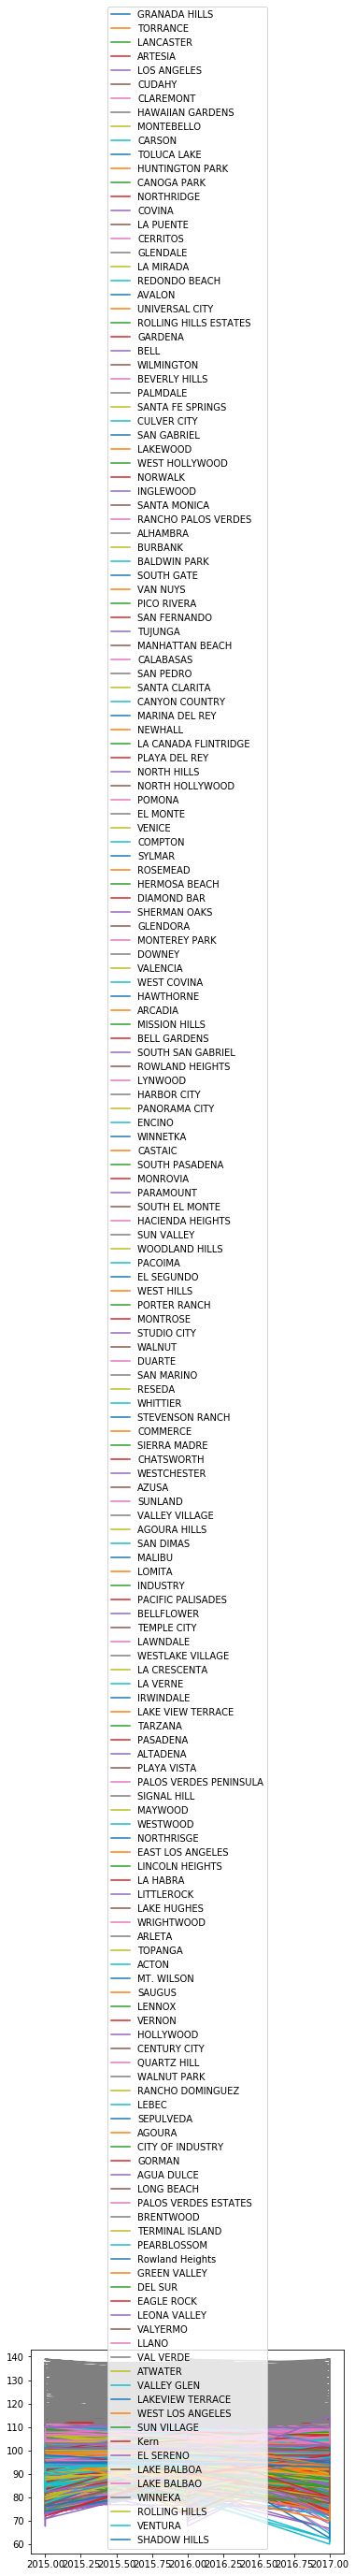

In [85]:
from matplotlib import pyplot as plt
import dateutil.parser as parser

cities = df.facility_city.unique()

legends = []
for city in cities:
    citySpecificData = df[df.facility_city == city]
    plt.plot(citySpecificData.year, citySpecificData.score/citySpecificData.score.iloc[0]*100)
    legends.append(city)
plt.legend(legends)
plt.show()

In [120]:
facility_centres = df.facility_name.unique()
resultfacility = ''
maxAddresses = 0

for facility_centre in facility_centres:
    facilityCentreSpecificData = df[df.facility_name == facility_centre]
    facilityCentreAddresses = facilityCentreSpecificData.facility_address.unique()
    print(len(facilityCentreAddresses))  
    if len(facilityCentreAddresses)>maxAddresses:
       maxAddresses=len(facilityCentreAddresses) 
       resultfacility = facility_centre
   
#facilityCentreSpecificData
resultfacility    

1
9
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
7
1
1
1
1
1
1
3
1
1
8
1
1
19
1
32
1
1
1
1
31
2
10
2
1
1
1
1
1
1
1
1
1
1
1
1
9
1
1
1
2
1
1
56
1
52
1
1
1
1
1
1
1
1
1
1
1
1
1
69
1
1
1
2
1
1
8
1
1
1
1
2
1
1
1
1
1
1
1
26
1
1
1
1
3
1
1
1
5
1
8
1
1
2
1
2
1
1
1
1
55
1
1
1
2
1
1
1
1
1
1
1
5
6
1
1
1
1
1
1
2
4
1
1
1
3
1
1
1
5
47
83
1
1
1
1
1
1
1
1
1
1
1
1
1
31
1
1
49
1
1
1
1
1
1
1
1
10
1
1
1
1
2
1
1
1
131
1
2
1
4
1
2
1
1
1
1
1
1
1
1
1
1
2
2
1
2
2
3
1
1
1
1
16
1
1
1
1
1
1
1
1
2
1
1
1
2
1
7
6
1
11
1
1
2
4
1
1
1
1
1
1
3
1
2
1
3
1
1
1
3
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
5
1
1
3
1
1
1
3
1
1
1
1
1
1
1
1
2
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
3
1
1
1
1
1
6
1
1
1
1
1
1
1
2
4
2
1
1
1
10
1
1
1
1
1
1
12
5
1
1
1
1
1
1
1
1
1
1
1
3
1
8
1
13
1
1
1
1
1
1
1
1
1
1
2
4
1
1
1
1
1
1
5
1
1
9
1
1
1
1
34
1
1
1
1
10
1
1
2
1
1
1
9
1
1
1
1
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
54
2
1
3
1
1
1
2
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
6
2
1
6
2
1
1
1
1
7
1
1
1
2
1
1
1
1
1
1
2
4
1
1
1
1
2
2
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
15
1
5
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
9
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
12
1
1
1
1
1
4
1
1
1
1
1
1
1
3
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
18
1
1
1
3
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
4
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
3
1
3
1
1
1
1
1
1
1
1
1
2
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
14
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
3
1
1
1
1
1
1
1
1
1
2
2
1
1
2
1
1
10
1
1
1
1
2
1
1
1
1
1
1
1
7
1
1
1
1
1
1
1
1
1
1
1
11
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
2
1
1
1
1
1
16
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
4
2
1
1
1
6
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
4
1
1
1
1
1
1
1
3
1
3
1
1
1
1
1
2
1
1
3
1
1
1
3
1
1
1
1
1
5
1
1
1
1
1
1

1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
4
1
1
1
1
1
1
1
1
1
1
6
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
6
1
1
1
1
1
1
4
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
3
2
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
1
1
2
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2


2
1
1
1
1
3
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
5
1
1
2
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
5
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
2
1
2
1
3
1
1
1
1
1
1
2
1
3
1
2
1
1
1
1
2
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
7
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
3
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
2
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
6
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
4
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1


1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


'SUBWAY'

In [159]:
# get all unique facilities
facilityIds = df.facility_id.unique()
print(len(facilityIds))

interestedFacilites = 0
ownerInitiatedValueMore = 0

for facilityid in facilityIds:
    facilityCentreSpecificData = df[df.facility_id == facilityid]
    ownerInitiatedData = facilityCentreSpecificData[facilityCentreSpecificData.service_description == "OWNER INITIATED ROUTINE INSPECT."]
    ownerInitiateddataMax = ownerInitiatedData.score.max()
    regularData = facilityCentreSpecificData[facilityCentreSpecificData.service_description == "ROUTINE INSPECTION"]
    regularDataMax = regularData.score.max()
    
    # Continue if there is at least one inspection initiated by owner for this facility
    if len(ownerInitiatedData) > 0:
        interestedFacilites = interestedFacilites+1
        if ownerInitiateddataMax > regularDataMax:
            ownerInitiatedValueMore = ownerInitiatedValueMore+1
            print(facilityid, ownerInitiateddataMax, regularDataMax)

print(interestedFacilites, ownerInitiatedValueMore)
print(ownerInitiatedValueMore/interestedFacilites*100)

44031
FA0176934 95 93
FA0060696 96 93
FA0066405 100 96
FA0165828 99 93
FA0138280 98 96
FA0071516 96 92
FA0044653 95 90
FA0242009 92 91
FA0029882 95 91
FA0028915 94 93
FA0055424 96 95
FA0037215 97 95
FA0163740 95 93
FA0164936 95 92
FA0014298 94 91
FA0167111 100 93
FA0159932 99 94
FA0002647 96 91
FA0061238 92 91
FA0035999 98 97
FA0052579 97 96
FA0164635 99 95
FA0023628 94 93
FA0171396 94 92
FA0222846 94 91
FA0160560 94 92
FA0179688 97 96
FA0071288 98 97
FA0047572 93 92
FA0251234 90 80
FA0225928 94 93
FA0007816 97 96
FA0166870 95 92
FA0033351 97 94
FA0030832 97 96
FA0030744 98 92
FA0008029 94 92
FA0149352 95 94
FA0009615 94 90
FA0012995 97 92
FA0180034 97 92
FA0163225 93 90
FA0241489 94 91
FA0057927 94 93
FA0052647 92 90
FA0062699 97 96
FA0045986 94 93
FA0167504 93 90
FA0159573 92 90
FA0174974 95 94
FA0225059 92 90
FA0165280 91 90
FA0070153 91 90
FA0039379 95 94
FA0242047 93 92
FA0177640 94 91
FA0018415 92 91
FA0224704 95 92
FA0243683 97 93
FA0224565 95 94
FA0178428 94 92
FA0172011 100 96

FA0138707 98 95
FA0026857 81 76
FA0001156 99 98
FA0138900 98 91
FA0239128 99 95
FA0026302 97 96
FA0012508 94 93
FA0008563 95 94
FA0013776 97 93
FA0066325 100 97
FA0039092 93 92
FA0032499 98 96
FA0041130 93 91
FA0039609 96 95
FA0023566 97 91
FA0030872 98 96
FA0067406 94 92
FA0251924 90 81
FA0023529 96 95
FA0138884 95 91
FA0171790 96 91
FA0239922 98 92
FA0030258 97 93
FA0203214 98 92
FA0061540 96 95
FA0011925 96 95
FA0018170 96 95
FA0137478 94 92
FA0173709 96 95
FA0029281 95 94
FA0021110 96 94
FA0159963 99 98
FA0223011 96 93
FA0022626 98 95
FA0202542 100 93
FA0144641 97 92
FA0068155 91 90
FA0028044 97 96
FA0072205 98 97
FA0060808 99 97
FA0203328 93 91
FA0023682 96 95
FA0180709 96 94
FA0225939 90 82
FA0166464 97 96
FA0170228 97 95
FA0017863 97 95
FA0023963 98 95
FA0074069 99 97
FA0222293 99 93
FA0032506 96 91
FA0250310 92 80
FA0002982 96 93
FA0051304 94 90
FA0047369 98 96
FA0037162 97 96
FA0037664 97 94
FA0021958 95 93
FA0138558 96 94
FA0137506 95 93
FA0069828 95 93
FA0018004 98 97
FA0159

In [137]:
# Method to get average of a list 
def Average(lst): 
    return sum(lst) / len(lst) 

# Method to convert values to base of 100. The value for first year will be 100,
# values for next years will be based on 100.
def Normalize(arr):
    baseValue = arr[0]
    normalizedArr = []
    for item in arr:
        normalizedArr.append(item/baseValue*100)
    return normalizedArr

cities = df.facility_city.unique()
years = df.year.unique()
years.sort()
years
numOfYears = len(years)

highestGrowthCity = ''
lowestGrowthCity = ''

highestGrowthRate = 0
lowestGrowthRate = 100

for city in cities:
    citySpecificData = df[df.facility_city == city]
    defaultValue = Average(citySpecificData.score)
    citySpecificValues = []
    for year in years:
        citySpecificInYear = citySpecificData[citySpecificData.year == year]
        if len(citySpecificInYear) == 0:
            citySpecificValues.append(defaultValue)
        else:
            citySpecificMeanInYear = citySpecificData[citySpecificData.year == year].score.mean() 
            citySpecificValues.append(citySpecificMeanInYear)
    cityspecificPercentWiseValues = Normalize(citySpecificValues)
    
    # check for the highest growth city
    if cityspecificPercentWiseValues[numOfYears-1] > highestGrowthRate:
        highestGrowthRate = cityspecificPercentWiseValues[numOfYears-1]
        highestGrowthCity = city
    
    # check for the lowest growth city
    if cityspecificPercentWiseValues[numOfYears-1] < lowestGrowthRate:
        lowestGrowthRate = cityspecificPercentWiseValues[numOfYears-1]
        lowestGrowthCity = city
        
print(highestGrowthCity)
print(highestGrowthRate)
print(lowestGrowthCity)
print(lowestGrowthRate)

PEARBLOSSOM
105.57077625570777
LAKE HUGHES
93.76153562200074


In [80]:
df['date'] = pd.to_datetime(df.activity_date)
df['year'] = df['date'].dt.year
df

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,...,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description,year,date
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,1612,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION,2017,2017-05-09
1,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,1638,SHAKEY'S PIZZA,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION,2017,2017-04-10
2,2017-04-04,EE0000593,17515 CHATSWORTH ST,GRANADA HILLS,FA0007801,BAITH AL HALAL,CA,91344,A,OW0031150,...,1612,BAITH AL HALAL,INACTIVE,PR0036723,95,DAL2PIKJU,1,ROUTINE INSPECTION,2017,2017-04-04
3,2017-08-15,EE0000971,44455 VALLEY CENTRAL WAY,LANCASTER,FA0013858,FOOD 4 LESS #306,CA,93536,A,OW0012108,...,1632,FOOD 4 LESS DELI/BAKERY#306,ACTIVE,PR0039905,98,DA0ZMAJXZ,1,ROUTINE INSPECTION,2017,2017-08-15
4,2016-09-26,EE0000145,11700 SOUTH ST,ARTESIA,FA0179671,PHO LITTLE SAIGON,CA,90701,A,OW0185167,...,1638,PHO LITTLE SAIGON,ACTIVE,PR0173311,96,DA41DBXA2,1,ROUTINE INSPECTION,2016,2016-09-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191366,2016-05-10,EE0000946,3461 W 3RD ST,LOS ANGELES,FA0053958,VONS MARKET,CA,90005,A,OW0038181,...,1630,STARBUCKS,ACTIVE,PR0021549,98,DAQW0V2BJ,1,ROUTINE INSPECTION,2016,2016-05-10
191367,2016-08-17,EE0000018,15420 S WESTERN AVE STE A,GARDENA,FA0174778,MOANA GRILL,CA,90249,A,OW0181412,...,1632,MOANA GRILL,ACTIVE,PR0167828,92,DAV0HVX0C,1,ROUTINE INSPECTION,2016,2016-08-17
191368,2016-06-30,EE0000029,11976 ARTESIA BLVD,ARTESIA,FA0029343,QUEST CAFE,CA,90701,A,OW0018341,...,1635,QUEST CAFE,INACTIVE,PR0042814,90,DATL8XDYB,1,ROUTINE INSPECTION,2016,2016-06-30
191369,2016-12-06,EE0000860,1430 W 25TH ST,SAN PEDRO,FA0043987,PINA'S MEXICAN RESTAURANT,CA,90731,A,OW0022835,...,1635,PINA'S MEXICAN RESTAURANT,ACTIVE,PR0042806,92,DA3FOEGAF,1,ROUTINE INSPECTION,2016,2016-12-06
